In [1]:
#written by Francis Osei Tutu Afrifa, 2023.

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gc
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

gc.collect()

4

#### Section A: ####

1. Create a 10,001-point array (one-dimension) with a starting value of 0 and an ending value of 10. Call this array time.


2. Create another 10,001-point array with a starting value of 0 and an ending value of $5\pi$ 


3. Create yet another 10,001-point array with a starting value of 0 and an ending value of $15\pi$

In [3]:
time = np.linspace(0,10,10001)  ### Create a 1D array of linearly spaced time values from 0 - 10s with size of 10,001 
arr2 = np.linspace(0, 5*np.pi, 10001)  ### 1D array of linearly spaced values from 0 - 5π with size of 10,001 
arr3 = np.linspace(0, 15*np.pi, 10001)  ### 1D array of linearly spaced values from 0 - 15π with size of 10,001 

2. a. From (2) create a sin function that is centered on +1 and has an amplitude of 5 (it should range from -1.5 to +3.5). Call this array signal1.


3. a. From (3) create a cosine function that is centered on 0 and has an amplitude of 2. Call this array signal2


4. Finally, create a third array that is the sum of signal1 and signal2. Call this array signal3.

In [5]:
signal1 = 2.5*np.sin(arr2) +1
signal2 = np.cos(arr3)
signal3 = signal1+signal2

5. Create a plot of all three arrays on the same graph. Differentiate the different signals by color and add a key to your plot. Label the x-axis as ‘time’ and the y-axis as ‘signal’. Label the plot title as ‘ATSC5011: Lab1 Signal Plot’. Set the y-axis limits from -5 to +5

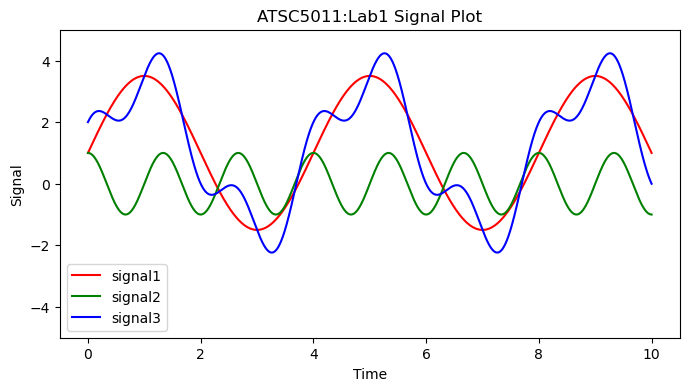

In [46]:
fig = plt.figure(figsize=(8,4))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()
ax.plot(time, signal1, label='signal1',c='r')
ax.plot(time, signal2, label= 'signal2', c = 'g')
ax.plot(time, signal3, label= 'signal3', c='b')

ax.set(title='ATSC5011:Lab1 Signal Plot', xlabel='Time', ylabel='Signal', ylim=(-5,5))
plt.legend()
plt.savefig('./%s.png' %('Lab1-Afrifa-Fig1'),bbox_inches='tight',dpi=100)
#plt.show()

### Section B (Exercise 2): ###

2. a.  – non-precipitating Marine Stratocumulus off the coast of California 
    
    Filename: 20060527a.c1.nc.
    
        This file is from a flight on May 27, 2006, west of Arcata CA. During the flight, the King Air profiled through the cloud, ascending from near the top at ~1500 m to the base at ~750 m. During this profile the King Air measured the droplet concentration, mean droplet diameter, and the liquid water content. In this exercise we will plot profiles of these three parameters to investigate how they varied with altitude within the cloud.

In [13]:
### Let's use imported xarray to Open and decode a dataset from the netcdf file '20060527a.c1.nc' :
file1_ = xr.open_dataset('20060527a.c1.nc')
file1_

<xarray.Dataset>
Dimensions:         (time: 15961, sps1: 1, Vec16: 16, Vec31: 31, pms21: 21,
                     pms20: 20, pms9: 9)
Coordinates:
  * time            (time) datetime64[ns] 2006-05-27T18:41:28 ... 2006-05-27T...
    ztrue           (time) float32 ...
    LATC            (time) float64 ...
    LONC            (time) float64 ...
Dimensions without coordinates: sps1, Vec16, Vec31, pms21, pms20, pms9
Data variables: (12/239)
    leap_sec        timedelta64[ns] ...
    base_time       datetime64[ns] ...
    time_offset     (time) datetime64[ns] ...
    TIME            (time) float32 ...
    DATE            (time) float32 ...
    HOUR            (time) timedelta64[ns] ...
    ...              ...
    rric            (time) float32 ...
    dbzwac          (time) float32 ...
    dbe0c           (time) float32 ...
    dbz0c           (time) float32 ...
    dbz1c           (time) float32 ...
    dbz7c           (time) float32 ...
Attributes: (12/68)
    Source:                    University of Wyoming, Department of Atmospher...
    Address:                   Dept. 3038, 1000 E. University Ave., Laramie, ...
    Phone:                     (307) 766-3246
    Conventions:               NCAR-RAF/nimbus
    DateProcessed:             Tue Jul 11 17:45:52 2006
    ProjectName:               DMIMS
    ...                        ...
    CVS_fssp:                   File get_fssp1.m Tag dmims06_qc2 Rev 1.46
    CVS_200x:                   File get_200x1.m Tag dmims06_qc2 Rev 1.20
    CVS_misc:                   File get_dmt1.m Tag dmims06_qc2 Rev 1.4
    CVS_232ralt:                File get_232ralt1.m Tag dmims06_qc2 Rev 1.3
    CVS_qc:                     File do_qc1.m Tag dmims06_qc2 Rev 1.4
    process2d_revision_id:     $Id: pms2dc.cdl,v 1.15 2005/12/07 18:22:48 ldo...

1. Read in the following variables to python:

    ‘TIME’: GMT time in HHMMSS
    
    ‘GALT’: Altitude from the GPS in meters (above mean sea level)
    
    ‘DBARF_IBL’: cloud droplet mean diameter (in µm)
    
    ‘jlb_conc2_IBL’: cloud droplet concentration (in # cm-3)
    
    ‘jlb_lwc2_IBL’: cloud liquid water content (in g m-3)


2. For each of the above variables extract data beginning at 21:06:00 (above cloud) through 21:40:00 (below cloud). Between these two times the aircraft was descending through the cloud.

In [14]:
### I did this using two methods:
''' 
A. Using the xarray.DataArray.sel() method and sliced the time for the given period.

This is a short and easy method to extract data out of xarray Dataset or xarray DataArray

'''
Time = file1_['TIME']
extracted_Time = Time.sel(time=slice('2006-05-27 21:06:00', '2006-05-27 21:40:00'))

GALT = file1_['GALT']
extracted_GALT = GALT.sel(time=slice('2006-05-27 21:06:00', '2006-05-27 21:40:00'))

DBARF_IBL = file1_['DBARF_IBL']
extracted_DBARF_IBL = DBARF_IBL.sel(time=slice('2006-05-27 21:06:00', '2006-05-27 21:40:00'))

jlb_conc2_IBL = file1_['jlb_conc2_IBL']
extracted_jlb_conc2_IBL = jlb_conc2_IBL.sel(time=slice('2006-05-27 21:06:00', '2006-05-27 21:40:00'))

jlb_lwc2_IBL = file1_['jlb_lwc2_IBL']
extracted_jlb_lwc2_IBL = jlb_lwc2_IBL.sel(time=slice('2006-05-27 21:06:00', '2006-05-27 21:40:00'))

################################################################################################################################

'''
B. Using the xarray.where method.

This is a longer method because we need to set conditions and extract the data that satifies the condition if True.
The plots will be generated from results obtained using this method

'''
# First let's create a new date range for the given time period using pandas:
    
datetime = pd.date_range(start = '2006-05-27 21:06:00', end='2006-05-27 21:40:00', name='time', freq='s' )


# Then do the extraction/selection based on the given datetime using the .where and numpy logical_and:

ext_GALT = GALT.where(np.logical_and(GALT[GALT.time.values>=datetime[0]], GALT[GALT.time.values<=datetime[2040]]))
ext_GALT = ext_GALT.fillna(0.)  ### Fill points where data is missing(Nan) with zeros

ext_DBARF_IBL = DBARF_IBL.where(np.logical_and(DBARF_IBL[DBARF_IBL.time.values>=datetime[0]], DBARF_IBL[DBARF_IBL.time.values<=datetime[2040]]))
ext_DBARF_IBL = ext_DBARF_IBL.fillna(0.)

ext_jlb_conc2_IBL = jlb_conc2_IBL.where(np.logical_and(jlb_conc2_IBL[jlb_conc2_IBL.time.values>=datetime[0]], jlb_conc2_IBL[jlb_conc2_IBL.time.values<=datetime[2040]]))
ext_jlb_conc2_IBL = ext_jlb_conc2_IBL.fillna(0.)

ext_jlb_lwc2_IBL = jlb_lwc2_IBL.where(np.logical_and(jlb_lwc2_IBL[jlb_lwc2_IBL.time.values>=datetime[0]], jlb_lwc2_IBL[jlb_lwc2_IBL.time.values<=datetime[2040]]))
ext_jlb_lwc2_IBL = ext_jlb_lwc2_IBL.fillna(0.)

ext_Time = Time.where(np.logical_and(Time[Time.time.values>=datetime[0]], Time[Time.time.values<=datetime[2040]]))
ext_Time = ext_Time.fillna(0.)

3. Create three profile plots (altitude should be your y-axis), one for each parameter. Label the axes and the plot title appropriately. Set the limits on the y-axes for all the plots from 0 to 2000 m. Adjust the x-axes as follows: liquid water content: 0 to 2.0; droplet concentration: 0 to 300; Mean Diameter 0 to 30 µm.

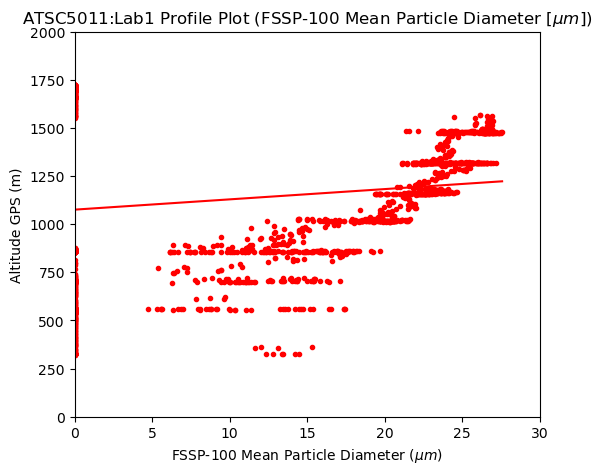

In [29]:
fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()
ax.scatter(ext_DBARF_IBL, ext_GALT,c='r',marker='.')

# Let's fit a line of best fit to determine the trend
ax.plot(np.unique(ext_DBARF_IBL), np.poly1d(np.polyfit(ext_DBARF_IBL, ext_GALT, 1))(np.unique(ext_DBARF_IBL)),c='r')

ax.set(title='ATSC5011:Lab1 Profile Plot (FSSP-100 Mean Particle Diameter [$\mu m$])',
       xlabel='FSSP-100 Mean Particle Diameter ($\mu m$)', ylabel='Altitude GPS (m)',
       xlim=(0,30), ylim=(0,2000))
plt.savefig('./%s.png' %('Lab1-Afrifa-Fig2a'),bbox_inches='tight',dpi=100)

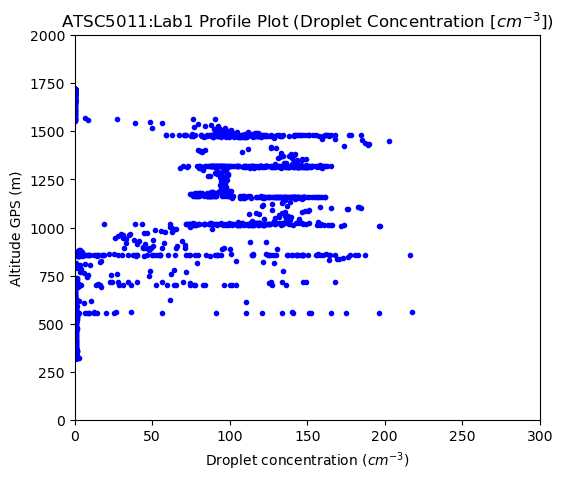

In [47]:
fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()
ax.scatter(ext_jlb_conc2_IBL, ext_GALT,c='b',marker='.')

# Let's fit a line of best fit to determine the trend
#ax.plot(np.unique(ext_jlb_conc2_IBL), np.poly1d(np.polyfit(ext_jlb_conc2_IBL, ext_GALT, 1))(np.unique(ext_jlb_conc2_IBL)),c='b')

ax.set(title='ATSC5011:Lab1 Profile Plot (Droplet Concentration [$cm^{-3}$])',
       xlabel='Droplet concentration ($cm^{-3}$)', ylabel='Altitude GPS (m)',
       xlim=(0,300), ylim=(0,2000))
plt.savefig('./%s.png' %('Lab1-Afrifa-Fig2b'),bbox_inches='tight',dpi=100)

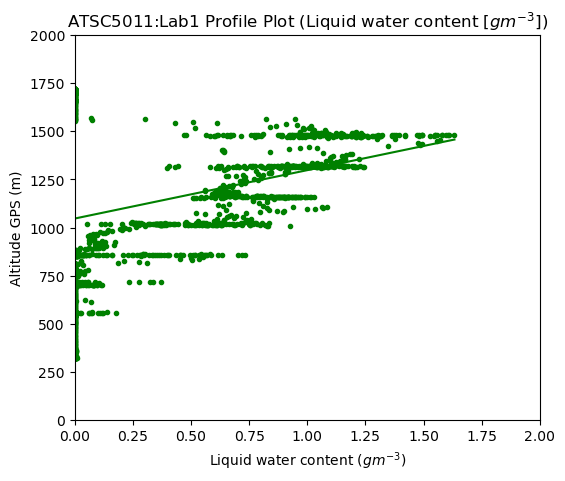

In [31]:
fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()
ax.scatter(ext_jlb_lwc2_IBL, ext_GALT,c='g',marker='.')

# Let's fit a line of best fit to determine the trend
ax.plot(np.unique(ext_jlb_lwc2_IBL), np.poly1d(np.polyfit(ext_jlb_lwc2_IBL, ext_GALT, 1))(np.unique(ext_jlb_lwc2_IBL)),c='g')

ax.set(title='ATSC5011:Lab1 Profile Plot (Liquid water content [$gm^{-3}$])',
       xlabel='Liquid water content ($gm^{-3}$)', ylabel='Altitude GPS (m)',
       xlim=(0,2.), ylim=(0,2000))
plt.savefig('./%s.png' %('Lab1-Afrifa-Fig2c'),bbox_inches='tight',dpi=100)

#### Section C: ####

2. b – non-precipitating Cumulus cloud in Southwest England
    
    Filename: 20130710.c1.nc

        This file is from a flight on July 10, 2013, over Wales in the western UK. During the flight 
        the King Air made several penetrations through non-precipitating cumulus congestus 
        clouds sample the clouds at different levels. We will once again plot profiles of the same 
        three parameters to investigate how thy change with altitude in cloud

In [32]:
### Let's use imported xarray to Open and decode a dataset from the netcdf file '20130710.c1.nc' :
file2_ = xr.open_dataset('20130710.c1.nc')
file2_

<xarray.Dataset>
Dimensions:                    (time: 11791, sps1: 1, Vec16: 16, Vec31: 31,
                                Vec28: 28, Vec101: 101, Vec20: 20, Vec30: 30,
                                Vec17: 17, Vec26: 26, Vec62: 62, Vec14: 14,
                                Vec100: 100, Vec96: 96, Vec95: 95)
Coordinates:
  * time                       (time) datetime64[ns] 2013-07-10T11:12:51 ... ...
    AVlat                      (time) float32 ...
    AVlon                      (time) float32 ...
    AVzmsl                     (time) float32 ...
Dimensions without coordinates: sps1, Vec16, Vec31, Vec28, Vec101, Vec20,
                                Vec30, Vec17, Vec26, Vec62, Vec14, Vec100,
                                Vec96, Vec95
Data variables: (12/329)
    TIME                       (time) float32 ...
    DATE                       (time) float32 ...
    HOUR                       (time) timedelta64[ns] ...
    MINUTE                     (time) timedelta64[ns] ...
    SECOND                     (time) timedelta64[ns] ...
    TIME14D                    (time) float64 ...
    ...                         ...
    CONC2_mod_cip_IBR          (time) float32 ...
    korolev_mod_concentration  (time) float32 ...
    CCIP0_mod_IBR              (time, sps1, Vec96) float32 ...
    CCIP1_mod_IBR              (time, sps1, Vec96) float32 ...
    CCIP2_mod_IBR              (time, sps1, Vec96) float32 ...
    korolev_mod_size           (time, sps1, Vec95) float32 ...
Attributes: (12/99)
    ApplanixSystemVersion:         AV-410,VER5,S/N3943,HW4.0-7,SW05.20-Nov04/...
    ApplanixGPSVersion:            BD960   S/N:5032K17412  SW:04.43 OMNISTAR ...
    ref2gps:                       [ 0.7698 -0.4146 -1.4208]
    FlightNumber:                  RF03
    HeaderUsed:                    C:\TDMS\header.tdms
    ProjectNumber:                 132
    ...                            ...
    Korolev_1Hz:                   Added
    Korolev_2D:                    Added
    CONC_mod_cip_IBR:              Added
    korolev_mod_concentration:     Added
    CCIP_mod_IBR:                  Added
    Korolev_mod_2D:                Added

1. Read in the following variables:
    
        ‘TIME’: GMT time in HHMMSS
        ‘GALT’: Altitude from the GPS in meters (above mean sea level)
        ‘cdpdbar_NRB’: cloud droplet mean diameter (in µm)
        ‘cdpconc_NRB’: cloud droplet concentration (in # cm-3)
        ‘cdplwc_NRB’: cloud liquid water content (in g m-3)


2. Because these were cumulus clouds, penetrations that occurred at different levels were separated in time. You need to select the following times that correspond to different levels in clouds and extract the data:
    
        a. Clouds base (~2400 m) 11:58:55 to 11:59:25
        b. Mid-level (~3300 m) 12:04:00 to 12:04:30
        c. Upper Mid-level (~3900 m) 12:07:00 to 12:08:00
        d. Cloud top (~4600 m) 12:54:30 to 12:56:00
    NOTE THAT THE TIMES GIVEN INCLUDE TIME OUTSIDE OF CLOUD BEFORE AND AFTER THE PENETRATION

In [33]:
''' 
Here, I make use of only the xarray.DataArray.sel() method and sliced the time for the given periods.

'''
################################################################################################################################
        ################################## Time VARIABLE EXTRACTION ######################################################

Time_2 = file2_['TIME']
Time_cb_2400 = Time_2.sel(time=slice('2013-07-10 11:58:55', '2013-07-10 11:59:25'))
Time_ml_3300 = Time_2.sel(time=slice('2013-07-10 12:04:00', '2013-07-10 12:04:30'))
Time_uml_3900 = Time_2.sel(time=slice('2013-07-10 12:07:00', '2013-07-10 12:08:00'))
Time_ct_4600 = Time_2.sel(time=slice('2013-07-10 12:54:30', '2013-07-10 12:56:00'))

################################################################################################################################
        ################################## GALT VARIABLE EXTRACTION ######################################################
    
GALT_2 = file2_['GALT']
GALT_cb_2400 = GALT_2.sel(time=slice('2013-07-10 11:58:55', '2013-07-10 11:59:25'))
GALT_ml_3300 = GALT_2.sel(time=slice('2013-07-10 12:04:00', '2013-07-10 12:04:30'))
GALT_uml_3900 = GALT_2.sel(time=slice('2013-07-10 12:07:00', '2013-07-10 12:08:00'))
GALT_ct_4600 = GALT_2.sel(time=slice('2013-07-10 12:54:30', '2013-07-10 12:56:00'))

################################################################################################################################
    ################################## cdpdbar_NRB VARIABLE EXTRACTION ######################################################

cdpdbar_NRB = file2_['cdpdbar_NRB']
cdpdbar_NRB_cb_2400 = cdpdbar_NRB.sel(time=slice('2013-07-10 11:58:55', '2013-07-10 11:59:25'))
cdpdbar_NRB_ml_3300 = cdpdbar_NRB.sel(time=slice('2013-07-10 12:04:00', '2013-07-10 12:04:30'))
cdpdbar_NRB_uml_3900 = cdpdbar_NRB.sel(time=slice('2013-07-10 12:07:00', '2013-07-10 12:08:00'))
cdpdbar_NRB_ct_4600 = cdpdbar_NRB.sel(time=slice('2013-07-10 12:54:30', '2013-07-10 12:56:00'))

################################################################################################################################
    ################################## cdpconc_NRB VARIABLE EXTRACTION ######################################################

cdpconc_NRB = file2_['cdpconc_NRB']
cdpconc_NRB_cb_2400 = cdpconc_NRB.sel(time=slice('2013-07-10 11:58:55', '2013-07-10 11:59:25'))
cdpconc_NRB_ml_3300 = cdpconc_NRB.sel(time=slice('2013-07-10 12:04:00', '2013-07-10 12:04:30'))
cdpconc_NRB_uml_3900 = cdpconc_NRB.sel(time=slice('2013-07-10 12:07:00', '2013-07-10 12:08:00'))
cdpconc_NRB_ct_4600 = cdpconc_NRB.sel(time=slice('2013-07-10 12:54:30', '2013-07-10 12:56:00'))

################################################################################################################################
    ################################## cdplwc_NRB VARIABLE EXTRACTION ######################################################

cdplwc_NRB = file2_['cdplwc_NRB']
cdplwc_NRB_cb_2400 = cdplwc_NRB.sel(time=slice('2013-07-10 11:58:55', '2013-07-10 11:59:25'))
cdplwc_NRB_ml_3300 = cdplwc_NRB.sel(time=slice('2013-07-10 12:04:00', '2013-07-10 12:04:30'))
cdplwc_NRB_uml_3900 = cdplwc_NRB.sel(time=slice('2013-07-10 12:07:00', '2013-07-10 12:08:00'))
cdplwc_NRB_ct_4600 = cdplwc_NRB.sel(time=slice('2013-07-10 12:54:30', '2013-07-10 12:56:00'))

3. From the data extracted in (2), build profile plots for liquid water content, droplet concentration, and mean diameter. For making the profiles you have a couple of options:
    
       a. You can choose the maximum value at that level, OR
       b. You can consider the points in cloud (for example, where droplet concentration is greater than or equal to 1) and compute the mean value at that level.

    For the altitude, you can simply compute the mean altitude during those time.


4. Label the axes and plot titles appropriately. Adjust the x-axes limits as follows: liquid water content 0 to 4; droplet concentration 0 to 2000; mean diameter 0 to 25 µm.

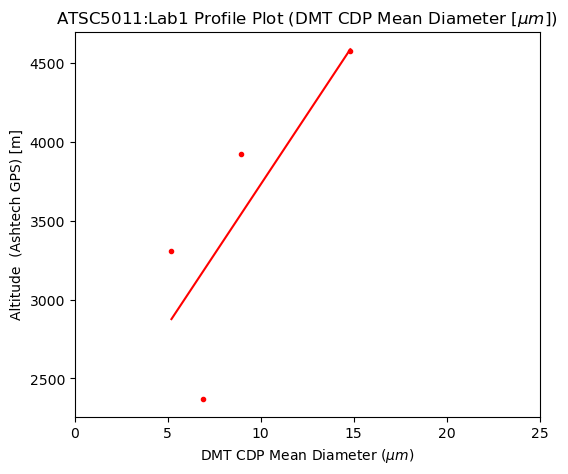

In [37]:
cdpdbar_NRB_cb_2400_p = cdpdbar_NRB_cb_2400[cdpdbar_NRB_cb_2400>=1]
cdpdbar_NRB_ml_3300_p = cdpdbar_NRB_ml_3300[cdpdbar_NRB_ml_3300>=1]
cdpdbar_NRB_uml_3900_p = cdpdbar_NRB_uml_3900[cdpdbar_NRB_uml_3900>=1]
cdpdbar_NRB_ct_4600_p = cdpdbar_NRB_ct_4600[cdpdbar_NRB_ct_4600>=1]

x = np.array([cdpdbar_NRB_cb_2400_p.mean('time').values.item(),cdpdbar_NRB_ml_3300_p.mean('time').values.item(),
             cdpdbar_NRB_uml_3900_p.mean('time').values.item(), cdpdbar_NRB_ct_4600_p.mean('time').values.item()])
y = np.array([GALT_cb_2400.mean('time').values.item(), GALT_ml_3300.mean('time').values.item(),
             GALT_uml_3900.mean('time').values.item(), GALT_ct_4600.mean('time').values.item()])

fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()
ax.scatter(x, y,c='r',marker='.')

# Let's fit a line of best fit to determine the trend
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='r')

ax.set(title='ATSC5011:Lab1 Profile Plot (DMT CDP Mean Diameter [$\mu m$])',
       xlabel='DMT CDP Mean Diameter ($\mu m$)', ylabel='Altitude  (Ashtech GPS) [m]',
       xlim=(0,25.))
plt.savefig('./%s.png' %('Lab1-Afrifa-Fig3a'),bbox_inches='tight',dpi=100)

In [48]:
pwd

'C:\\Users\\Francis\\Desktop\\LAB\\PhysMet2'

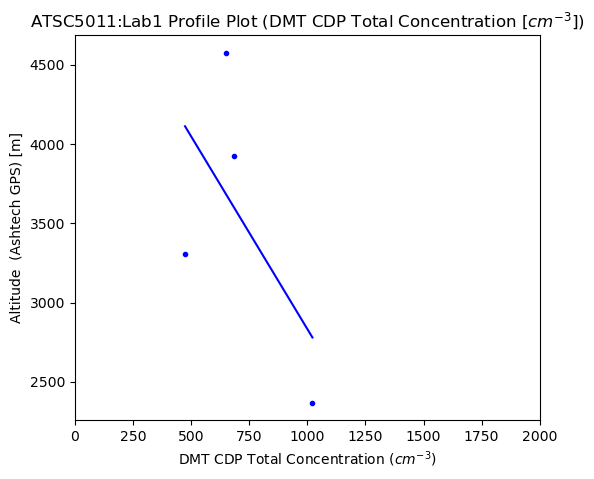

In [49]:
cdpconc_NRB_cb_2400_p = cdpconc_NRB_cb_2400[cdpconc_NRB_cb_2400>=1]
cdpconc_NRB_ml_3300_p = cdpconc_NRB_ml_3300[cdpconc_NRB_ml_3300>=1]
cdpconc_NRB_uml_3900_p = cdpconc_NRB_uml_3900[cdpconc_NRB_uml_3900>=1]
cdpconc_NRB_ct_4600_p = cdpconc_NRB_ct_4600[cdpconc_NRB_ct_4600>=1]

x1 = np.array([cdpconc_NRB_cb_2400_p.mean('time').values.item(),cdpconc_NRB_ml_3300_p.mean('time').values.item(),
             cdpconc_NRB_uml_3900_p.mean('time').values.item(), cdpconc_NRB_ct_4600_p.mean('time').values.item()])

fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()
ax.scatter(x1, y,c='b',marker='.')

# Let's fit a line of best fit to determine the trend
ax.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y, 1))(np.unique(x1)),c='b')

ax.set(title='ATSC5011:Lab1 Profile Plot (DMT CDP Total Concentration [$cm^{-3}$])',
       xlabel='DMT CDP Total Concentration ($cm^{-3}$)', ylabel='Altitude  (Ashtech GPS) [m]',
       xlim=(0,2000.))
plt.savefig('./%s.png' %('Lab1-Afrifa-Fig3b'),bbox_inches='tight',dpi=100)

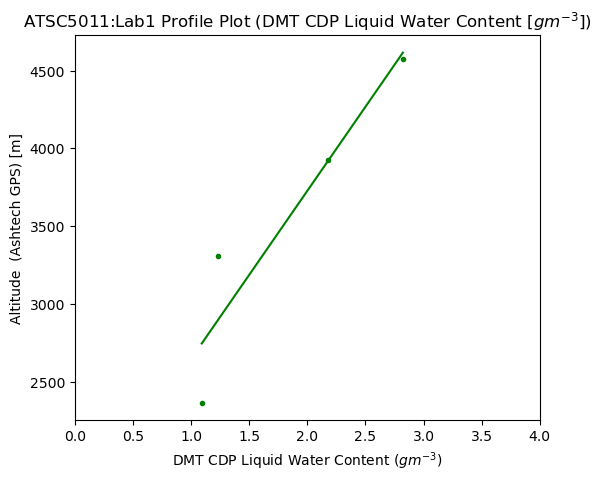

In [50]:
cdplwc_NRB_cb_2400_p = cdplwc_NRB_cb_2400[cdplwc_NRB_cb_2400>=1]
cdplwc_NRB_ml_3300_p = cdplwc_NRB_ml_3300[cdplwc_NRB_ml_3300>=1]
cdplwc_NRB_uml_3900_p = cdplwc_NRB_uml_3900[cdplwc_NRB_uml_3900>=1]
cdplwc_NRB_ct_4600_p = cdplwc_NRB_ct_4600[cdplwc_NRB_ct_4600>=1]

x2 = np.array([cdplwc_NRB_cb_2400_p.mean('time').values.item(),cdplwc_NRB_ml_3300_p.mean('time').values.item(),
             cdplwc_NRB_uml_3900_p.mean('time').values.item(), cdplwc_NRB_ct_4600_p.mean('time').values.item()])

fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()
ax.scatter(x2, y,c='g',marker='.')

# Let's fit a line of best fit to determine the trend
ax.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y, 1))(np.unique(x2)),c='g')

ax.set(title='ATSC5011:Lab1 Profile Plot (DMT CDP Liquid Water Content [$gm^{-3}$])',
       xlabel='DMT CDP Liquid Water Content ($gm^{-3}$)', ylabel='Altitude  (Ashtech GPS) [m]',
       xlim=(0,4.))
plt.savefig('./%s.png' %('Lab1-Afrifa-Fig3c'),bbox_inches='tight',dpi=100)

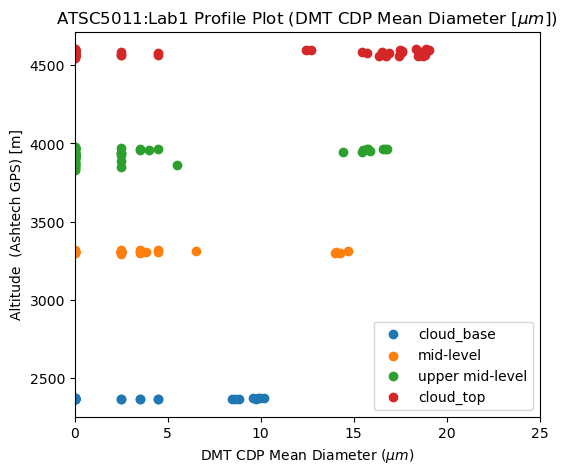

In [45]:
fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()

ax.scatter(cdpdbar_NRB_cb_2400,GALT_cb_2400, label='cloud_base')
ax.scatter(cdpdbar_NRB_ml_3300,GALT_ml_3300, label='mid-level')
ax.scatter(cdpdbar_NRB_uml_3900,GALT_uml_3900, label='upper mid-level')
ax.scatter(cdpdbar_NRB_ct_4600,GALT_ct_4600, label='cloud_top')

ax.set(title='ATSC5011:Lab1 Profile Plot (DMT CDP Mean Diameter [$\mu m$])',
       xlabel='DMT CDP Mean Diameter ($\mu m$)', ylabel='Altitude  (Ashtech GPS) [m]',
       xlim=(0,25.))
plt.legend()
plt.show()

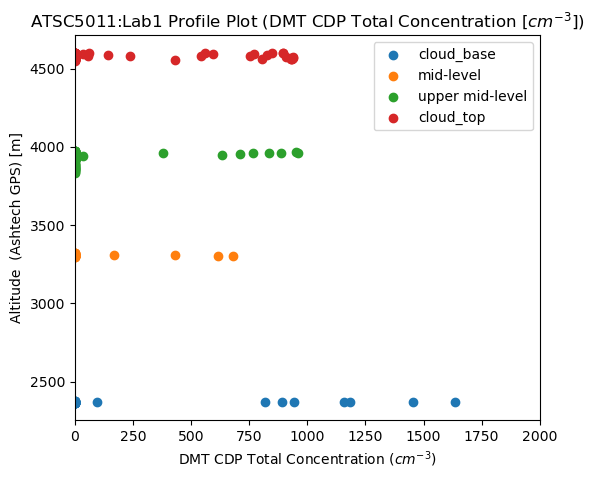

In [43]:
fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()

ax.scatter(cdpconc_NRB_cb_2400,GALT_cb_2400, label='cloud_base')
ax.scatter(cdpconc_NRB_ml_3300,GALT_ml_3300, label='mid-level')
ax.scatter(cdpconc_NRB_uml_3900,GALT_uml_3900, label='upper mid-level')
ax.scatter(cdpconc_NRB_ct_4600,GALT_ct_4600, label='cloud_top')

ax.set(title='ATSC5011:Lab1 Profile Plot (DMT CDP Total Concentration [$cm^{-3}$])',
       xlabel='DMT CDP Total Concentration ($cm^{-3}$)', ylabel='Altitude  (Ashtech GPS) [m]',
       xlim=(0,2000.))
plt.legend()
plt.show()

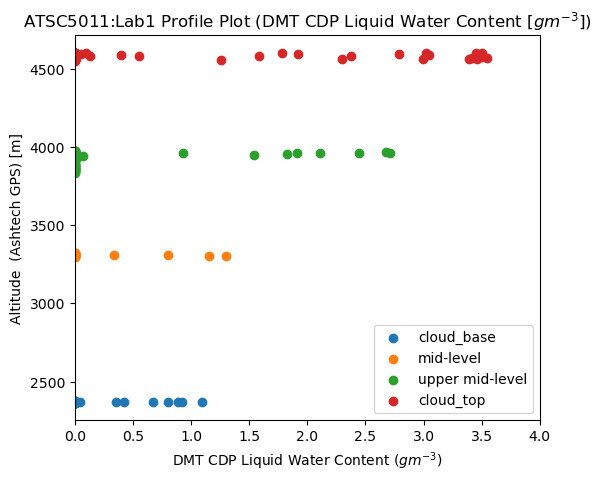

In [42]:
fig = plt.figure(figsize=(6,5))
fig.patch.set_facecolor('xkcd:white') #Set the background = ‘white'
ax = plt.axes()

ax.scatter(cdplwc_NRB_cb_2400,GALT_cb_2400, label='cloud_base')
ax.scatter(cdplwc_NRB_ml_3300,GALT_ml_3300, label='mid-level')
ax.scatter(cdplwc_NRB_uml_3900,GALT_uml_3900, label='upper mid-level')
ax.scatter(cdplwc_NRB_ct_4600,GALT_ct_4600, label='cloud_top')



ax.set(title='ATSC5011:Lab1 Profile Plot (DMT CDP Liquid Water Content [$gm^{-3}$])',
       xlabel='DMT CDP Liquid Water Content ($gm^{-3}$)', ylabel='Altitude  (Ashtech GPS) [m]',
       xlim=(0,4.))
plt.legend()
plt.show()
#plt.savefig('./%s.png' %('Lab1-Afrifa-Fig3b'),bbox_inches='tight',dpi=100)